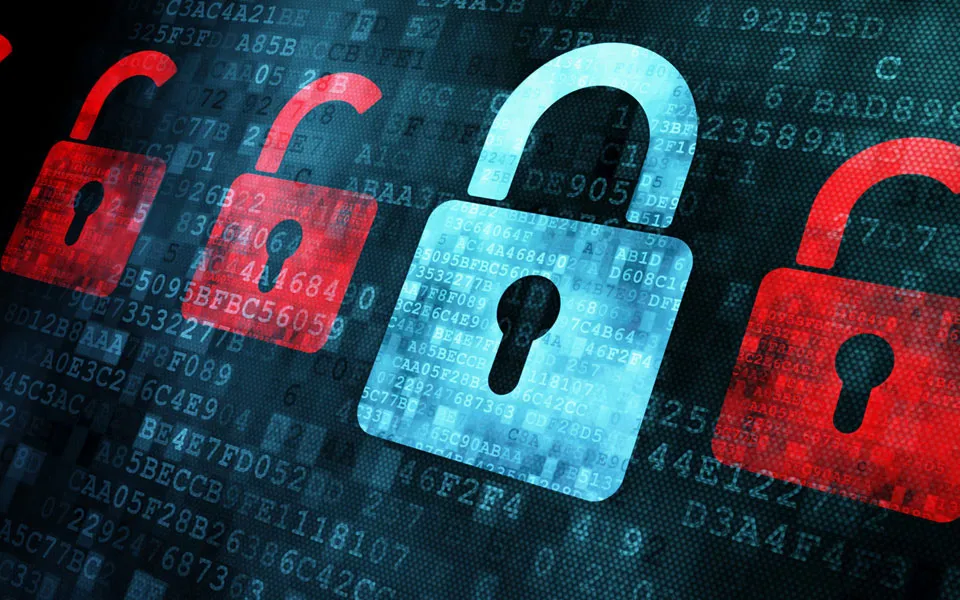

### `Goal`: **Notifying users of the strength of their password during the sign-up process on websites can be achieved by developing a machine learning model. This model would analyze and categorize passwords into classifications such as ‘Weak’, ‘Medium’, or ‘Strong’**

#`About Dataset-- Password —100,000 unique values for password collected online`

# Strength should be rated as weak, medium, or strong (0, 1, or 2) based on password rules that include digits, special symbols, etc.

# Data is imported from SQL database file (.sqlite).

In [120]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
con = sqlite3.connect(r"/content/password_data.sqlite")
data = pd.read_sql_query("SELECT * FROM Users" , con)
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


## [DATA CLEANING]

`Data cleaning is a crucial stage before performing any analysis since the dataframe might contain duplicates, missing values, or irrelevant rows.`

In [121]:
data.isna().sum()

,0
index,0
password,0
strength,0


In [122]:
data.duplicated().sum()

0

In [123]:
#I removed the index columns since the dataframe already has an index.
data=data.drop('index',axis=1)

In [124]:
data['strength'].unique()

array([1, 2, 0])

# Before Performing Semantic Analysis We Have To Check for:

- `Count the number of passwords that contain only numeric characters, only uppercase characters, only alphabets, alphanumeric characters, title-case characters, and those containing special characters.`


In [125]:
# DataFrame containing passwords with only numeric characters
numeric_passwords = data[data['password'].str.isnumeric()]
print("Passwords with only numeric characters:", numeric_passwords.shape)

# DataFrame containing passwords with only uppercase characters
uppercase_passwords = data[data['password'].str.isupper()]
print("Passwords with only uppercase characters:", uppercase_passwords.shape)

# DataFrame containing passwords with only alphabetic characters
alphabet_passwords = data[data['password'].str.isalpha()]
print("Passwords with only alphabetic characters:", alphabet_passwords.shape)

# DataFrame containing passwords with alphanumeric characters
alphanumeric_passwords = data[data['password'].str.isalnum()]
print("Passwords with alphanumeric characters:", alphanumeric_passwords.shape)

# DataFrame containing passwords with title-case characters
titlecase_passwords = data[data['password'].str.istitle()]
print("Passwords with title-case characters:", titlecase_passwords.shape)


Passwords with only numeric characters: (26, 2)
Passwords with only uppercase characters: (1506, 2)
Passwords with only alphabetic characters: (50, 2)
Passwords with alphanumeric characters: (97203, 2)
Passwords with title-case characters: (932, 2)


In [126]:
import string

def find_semantics(row):
  for char in row:
    if  char in string.punctuation:
      return 1
    else:
      pass
data[data['password'].apply(find_semantics)==1]
# 2.6% people password actually uses special character in their password

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


## `Analysis`

- Only 26 people have set their password only with numbers

- Around 1500 users have their password as only capital letters

- 50 users have their password with alphabet letters only

- Most of the users around 97k have their password as alpha-numeric

- 932 users have their password having first alphabet capital

- 2663 people set their password with at least one special character

#`Feature Engineering`
- After researching on Google, I identified five common factors that determine the strength of a password.

### Length of password

### Frequency of Lowercase Characters

### Frequency of Uppercase Characters

### Frequency of Numeric Characters

### Frequency of Special Characters

##`length of every Password`

In [127]:
data['password'][0]

'zxe870819'

In [128]:
data['Length']=data['password'].str.len()

##`Frequency of Lowercase Characters :`

In [129]:
password='jbssdfhjfghPO34gr'

In [130]:
[char for char in password if char.islower()]

['j', 'b', 's', 's', 'd', 'f', 'h', 'j', 'f', 'g', 'h', 'g', 'r']

In [131]:
len([char for char in password if char.islower()])

13

In [132]:
len([char for char in password if char.islower()])/len(password)

0.7647058823529411

# The reason why I am diving each value by its Total length is to get rid of some outliers because some passwords have huge length as we have seen, hence value of lowercase could also be high, so I want to normalize it in the range between 0 to 1

In [133]:
def is_lower(row):
  return len([char for char in row if char.islower()])/len(row)

##`Frequency of Uppercase Characters:`

In [134]:
def is_upper(row):
  return len([char for char in row if char.isupper()])/len(row)

##`Frequency of Numeric Characters:`

In [135]:
def is_numeric(row):
  return len([char for char in row if char.isnumeric()])/len(row)

In [136]:
data['lower_char_frequency']=np.round(data['password'].apply(is_lower),3)
data['upper_char_frequency']=np.round(data['password'].apply(is_upper),3)
data['numeric_char_frequency']=np.round(data['password'].apply(is_numeric),3)

In [137]:
data.head()

,password,strength,Length,lower_char_frequency,upper_char_frequency,numeric_char_frequency
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


## `Frequency of Special-case Characters:`

In [138]:
def is_special(row):
  special_characters = set(string.punctuation)
  return len([char for char in row if char in special_characters])/len(row)

In [139]:
data['special_char_frequency']=np.round(data['password'].apply(is_special),3)

In [140]:
data.head()

,password,strength,Length,lower_char_frequency,upper_char_frequency,numeric_char_frequency,special_char_frequency
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


## `Performing Descriptive Statistics`

In [141]:
data.groupby('strength')['Length'].agg({"min", "max" , "mean" , "median"})

,max,median,min,mean
strength,,,,
0,7,7.0,1,6.550947
1,13,9.0,8,9.611074
2,220,16.0,14,15.953421


In [142]:
data[['strength','lower_char_frequency','upper_char_frequency','numeric_char_frequency','special_char_frequency']].groupby('strength').agg(
    {"min", "max" , "mean" , "median"})

lower_char_frequency                       upper_char_frequency  \
                          max median  min      mean                  max   
strength                                                                   
0                       1.000  0.714  0.0  0.708050                1.000   
1                       0.923  0.667  0.0  0.630067                0.923   
2                       0.917  0.400  0.0  0.424679                0.889   

                               numeric_char_frequency                        \
         median  min      mean                    max median  min      mean   
strength                                                                      
0         0.000  0.0  0.012872                  1.000  0.286  0.0  0.275383   
1         0.000  0.0  0.007915                  0.923  0.333  0.0  0.360123   
2         0.429  0.0  0.367633                  0.895  0.188  0.0  0.193796   

         special_char_frequency                        
                            max median  min      mean  
strength                                               
0                         1.000    0.0  0.0  0.003195  
1                         0.818    0.0  0.0  0.001729  
2                         0.741    0.0  0.0  0.013602

##`It has been found that the strength of a password increases with its length. Additionally, by observing the mean value, it can be seen that the frequency of lowercase letters is inversely related to the password strength. However, other than these two features, it is difficult to identify any other relationships between password characteristics and strength.`

## `Visualization of features`

In [143]:
data.columns

Index(['password', 'strength', 'Length', 'lower_char_frequency',
       'upper_char_frequency', 'numeric_char_frequency',
       'special_char_frequency'],
      dtype='object')

In [144]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=('Length', 'Lower Char Frequency', 'Upper Char Frequency', 'Numeric Char Frequency', 'Special Char Frequency'),
                    vertical_spacing=0.2, horizontal_spacing=0.2)

# Add box plot for 'Length'
fig.add_trace(
    go.Box(x=data['strength'], y=data['Length'], name='Length', boxmean='sd'),
    row=1, col=1
)

# Add box plot for 'lower_char_frequency'
fig.add_trace(
    go.Box(x=data['strength'], y=data['lower_char_frequency'], name='Lower Char Frequency', boxmean='sd'),
    row=1, col=2
)

# Add box plot for 'upper_char_frequency'
fig.add_trace(
    go.Box(x=data['strength'], y=data['upper_char_frequency'], name='Upper Char Frequency', boxmean='sd'),
    row=2, col=1
)

# Add box plot for 'numeric_char_frequency'
fig.add_trace(
    go.Box(x=data['strength'], y=data['numeric_char_frequency'], name='Numeric Char Frequency', boxmean='sd'),
    row=2, col=2
)

# Add box plot for 'special_char_frequency'
fig.add_trace(
    go.Box(x=data['strength'], y=data['special_char_frequency'], name='Special Char Frequency', boxmean='sd'),
    row=3, col=1
)

# Update layout
fig.update_layout(
    title_text='Box Plots of Various Features',
    showlegend=False,
    width=1000,height=1000
)

# Show the figure
fig.show()


## `Observation`
 - **Higher Lowercase frequency is seen in low strength passwords. For higher strength passwords, Lowercase frequency can be high too but that is probably effect of length.**
 - **No specific relation btw strenth and numeric_char_frequency**
 - **There is a trend but not strong as length and lower frequency**.
 - **Similar but stronger same trend as above in special_freq.**
 - **Higher strength passwords have more type breaks.**

##**Feature Importance**

In [145]:
data.columns

Index(['password', 'strength', 'Length', 'lower_char_frequency',
       'upper_char_frequency', 'numeric_char_frequency',
       'special_char_frequency'],
      dtype='object')

In [146]:
def get_dist(data,feature):
  plt.figure(figsize=(10,8))
  plt.subplot(1,2,1 )
  sns.violinplot(data,x='strength',y=feature)
  plt.subplot(1,2,2)
  sns.distplot(data[data['strength']==0][feature],color='red',label='0',hist=False)
  sns.distplot(data[data['strength']==1][feature],color='blue',label='1',hist=False)
  sns.distplot(data[data['strength']==2][feature],color='orange',label='2',hist=False)
  plt.legend()
  plt.show()

In [147]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

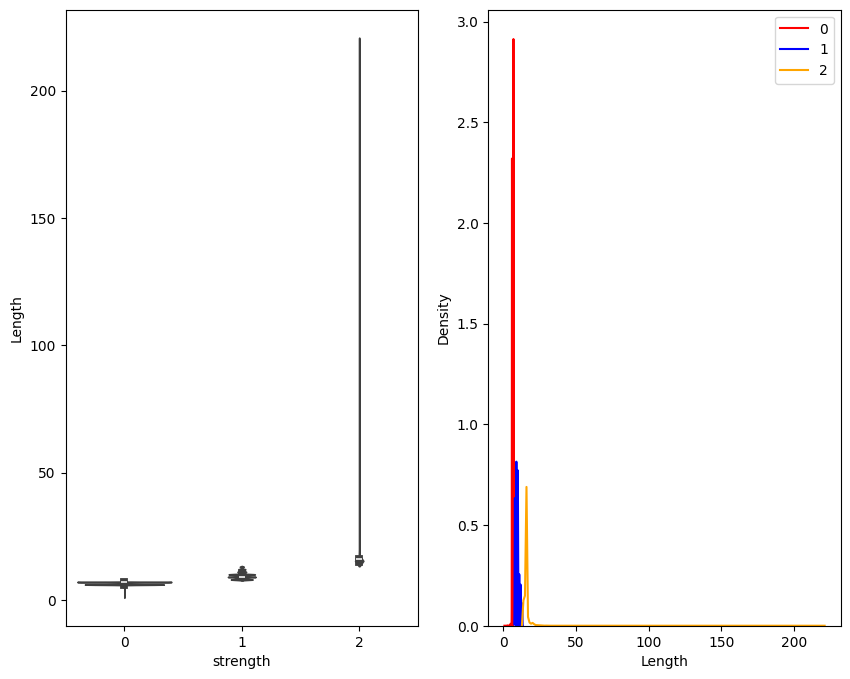

In [148]:
get_dist(data,'Length')

**we have few overlappping region in distribution plot
when class is 2 , we have higher value of 'length' than class 1 & class 0
it means 'length' is a interesting feature as we have very less overlapping region
similarly from violinplot, we will say on account of less overlappping
this feature 'length' is amazing & useful in determining the strength.**

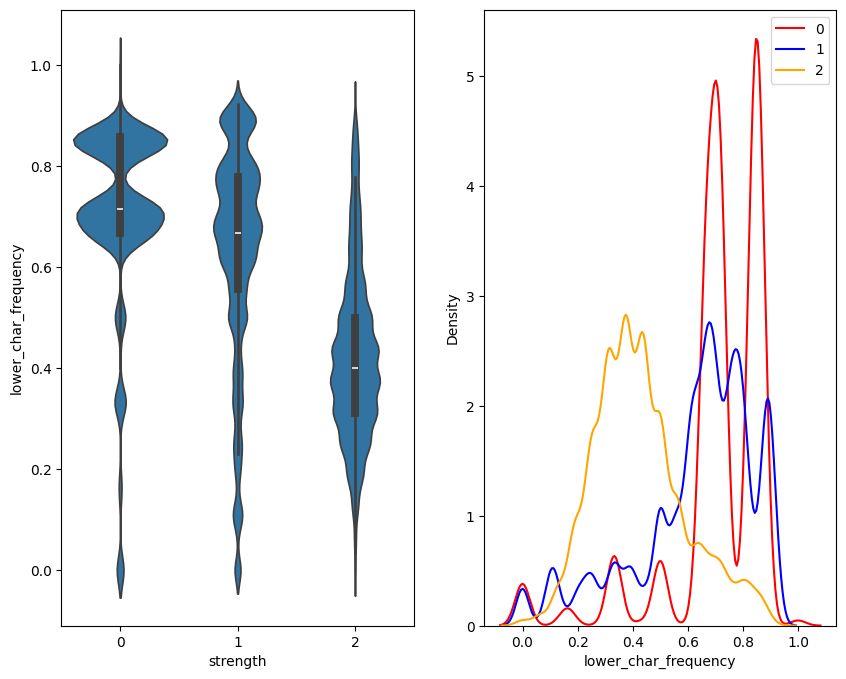

In [149]:
get_dist(data,'lower_char_frequency')

In [150]:
# we have some kind of overlappping region in distribution plot
# when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

# it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

# similarly from violinplot ,we will say on account of such overlappping ,
# when class is 2 we have less value of 'lower_freq' than class 1 & class 0
# this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

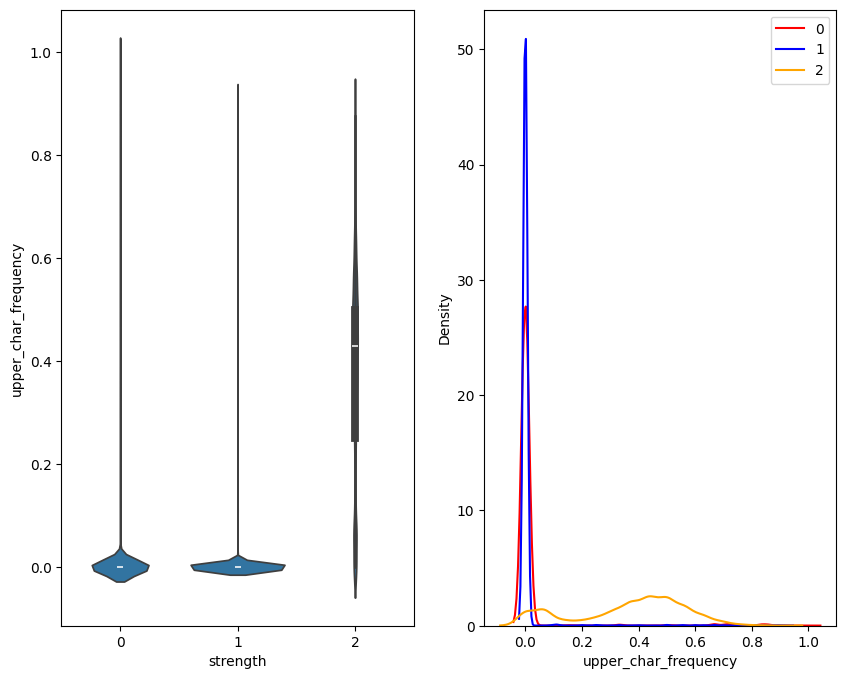

In [151]:
get_dist(data,'upper_char_frequency')

In [152]:
#we have quite high overlappping region in distribution plot
# it means 'upper_freq' is not that much interesting feature as have some overlapping region
#density is also low in strength '2'

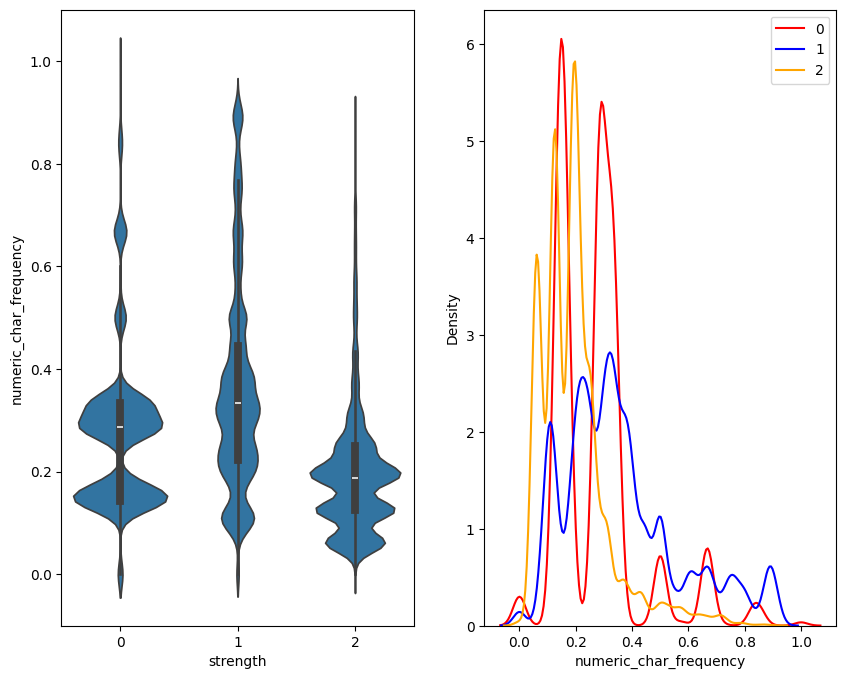

In [153]:
get_dist(data,'numeric_char_frequency')

In [154]:
# we have quite high overlappping region in distribution plot
# it means 'upper_freq' is not that much interesting feature as have some overlapping region

# similarly from violinplot, we will say on account of such huge overlappping ,
# this feature 'lower_freq' is not a interesting feature in determining the strength

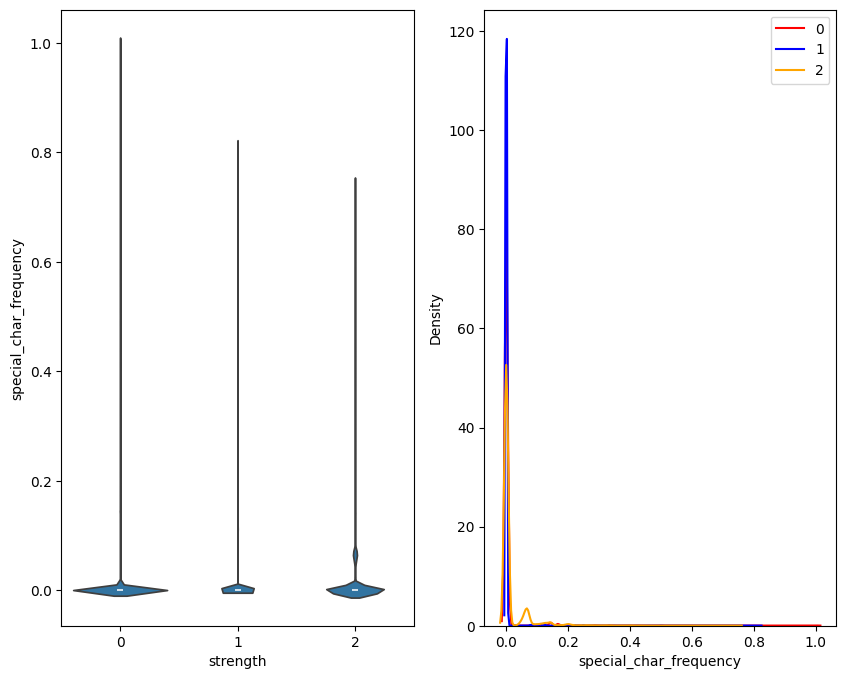

In [155]:
get_dist(data,'special_char_frequency')

In [156]:
# Key Insight : It gives us idea that length & lowercase freq are important features..

**Term Frequency & Inverse Document Frequency**

In [157]:
#TF_IDF (Term Frequency & Inverse Document Frequency)
#TF-IDF vectorizer is a tool that converts text data into numerical data. When dealing with passwords, which are a series of characters,
#we need to calculate the TF-IDF values for each individual character. To accomplish this,
#we first split the password into a list of its constituent characters. Then, we create a matrix X,
#where each row corresponds to a single password and each of the 99 columns represents a unique character,
#digit, or special character that could appear in a password.

In [158]:
data=data.sample(frac=1)
data

,password,strength,Length,lower_char_frequency,upper_char_frequency,numeric_char_frequency,special_char_frequency
98340,lampung12,1,9,0.778,0.0,0.222,0.0
76445,jedoryc523,1,10,0.700,0.0,0.300,0.0
38327,krishna1981,1,11,0.636,0.0,0.364,0.0
70310,vishu007,1,8,0.625,0.0,0.375,0.0
67073,6free6,0,6,0.667,0.0,0.333,0.0
...,...,...,...,...,...,...,...
47215,paschyy95,1,9,0.778,0.0,0.222,0.0
27888,188095abc,1,9,0.333,0.0,0.667,0.0
67718,matias26isai,1,12,0.833,0.0,0.167,0.0
41019,kyoshiro1,1,9,0.889,0.0,0.111,0.0


In [159]:
X=list(data['password'])
X[:10]

['lampung12',
 'jedoryc523',
 'krishna1981',
 'vishu007',
 '6free6',
 'remoto123',
 'pa0101',
 'pzyracgjq136',
 'chati0007',
 'gokusan194']

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
victorizer=TfidfVectorizer(analyzer='char')
X=victorizer.fit_transform(X)

In [161]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25576699, 0.29591001, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.24631279, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.39099225, 0.        ,
       0.        , 0.        , 0.        , 0.35518914, 0.34040338,
       0.31664418, 0.        , 0.40666033, 0.        , 0.        ,
       0.        , 0.        , 0.3546909 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [163]:
len(X.toarray()[0])

99

In [164]:
victorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [165]:
X.shape

(100000, 99)

In [166]:
df=pd.DataFrame(X.toarray(),columns=victorizer.get_feature_names_out())

In [167]:
pd.set_option('display.max_columns',None)
df.head()

,,,,,,,,,!,#,$,%,&,(,),*,+,-,.,/,0,1,2,3,4,5,6,7,8,9,;,<,=,>,?,@,[,\,],^,_,`,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,{,|,},~,¡,¨,°,±,³,´,µ,·,ß,à,á,ä,æ,ç,é,ê,í,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.255767,0.295910,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246313,0.0,0.0000,0.000000,0.000000,0.000000,0.390992,0.000000,0.000000,0.000000,0.000000,0.355189,0.340403,0.316644,0.000000,0.40666,0.0,0.000000,0.000000,0.0,0.354691,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.266684,0.298688,0.0,0.333893,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.3477,0.334356,0.260047,0.000000,0.000000,0.000000,0.000000,0.385179,0.000000,0.000000,0.000000,0.000000,0.272769,0.00000,0.0,0.295700,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.34302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.447980,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.327906,0.313171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215710,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.348155,0.261855,0.000000,0.334026,0.000000,0.000000,0.277304,0.000000,0.00000,0.0,0.287341,0.293888,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589812,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.341821,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.351662,0.264492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.296848,0.0,0.313752,0.393826,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.695495,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.516968,0.403286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.293923,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#`Applying ML algorithm`

Logistic Regression

Classification algorithm

- Linear Regression in classification has drawback that once have outliers in the data, the entire line gets deviated and result in high error rate.
- Need to generate best-fit line each time when new data is coming in.

- Most of the time, we get probability greater than 1 and less than 0.

These are the reason why we have to use Logistic Regression

- Linearly separable
- Positive distance above the plane
- Negative distance below the plane
- Logistic Regression predicts whether sometihg is True or False, instead of predicting something continuous like size and tells the probability (Used to classify samples)

In [168]:
df.columns

Index(['', '', '', '', '', '', '', ' ', '!', '#', '$', '%', '&', '(',
       ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|',
       '}', '~', '¡', '¨', '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä',
       'æ', 'ç', 'é', 'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ',
       '›'],
      dtype='object')

In [169]:
df['Length']=data['Length']
df['lower_char_frequency']=data['lower_char_frequency']

In [170]:
df.head()

,,,,,,,,,!,#,$,%,&,(,),*,+,-,.,/,0,1,2,3,4,5,6,7,8,9,;,<,=,>,?,@,[,\,],^,_,`,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,{,|,},~,¡,¨,°,±,³,´,µ,·,ß,à,á,ä,æ,ç,é,ê,í,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›,Length,lower_char_frequency
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.255767,0.295910,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246313,0.0,0.0000,0.000000,0.000000,0.000000,0.390992,0.000000,0.000000,0.000000,0.000000,0.355189,0.340403,0.316644,0.000000,0.40666,0.0,0.000000,0.000000,0.0,0.354691,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.266684,0.298688,0.0,0.333893,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.3477,0.334356,0.260047,0.000000,0.000000,0.000000,0.000000,0.385179,0.000000,0.000000,0.000000,0.000000,0.272769,0.00000,0.0,0.295700,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.34302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.447980,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.327906,0.313171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215710,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.348155,0.261855,0.000000,0.334026,0.000000,0.000000,0.277304,0.000000,0.00000,0.0,0.287341,0.293888,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589812,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.341821,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.351662,0.264492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.296848,0.0,0.313752,0.393826,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.695495,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.516968,0.403286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.293923,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625


In [171]:
y=data['strength']

In [172]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [173]:
X_train.shape

(80000, 101)

In [174]:
from sklearn.linear_model import  LogisticRegression
regression=LogisticRegression(multi_class="multinomial")

In [175]:
regression

LogisticRegression(multi_class='multinomial')

In [176]:
kf=KFold(n_splits=5,shuffle=True,random_state=99)
score=cross_val_score(regression,df,y,cv=kf)

In [177]:
score

array([0.802  , 0.80655, 0.8039 , 0.7987 , 0.80275])

In [178]:
print(f'Cross_validation_score of  Model:{np.mean(score)*100}')

Cross_validation_score of  Model:80.27799999999999


In [179]:
regression.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [180]:
kf=KFold(n_splits=5,shuffle=True,random_state=99)
score=cross_val_score(regression,X_train,y_train,cv=kf)

In [181]:
print(f'Cross_validation_score of train dataset:{np.mean(score)*100}')

Cross_validation_score of train dataset:79.95500000000001


In [183]:
pred_reg=regression.predict(X_test)

In [184]:
pred_reg

array([1, 2, 0, ..., 2, 1, 1])

In [188]:
from collections import Counter
Counter(pred_reg)

Counter({1: 17191, 2: 1672, 0: 1137})

##`Doing prediction on sample data (user-entered input)`

In [189]:
password = "%@123abcd"

In [197]:
sample_array=np.array([password])

In [198]:
sample_array

array(['%@123abcd'], dtype='<U9')

In [199]:
sample_matrix=victorizer.transform(sample_array)
sample_matrix

<1x99 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [201]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [202]:
sample_matrix.toarray().shape

(1, 99)

In [203]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [204]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [205]:
len(password)

9

In [206]:
np.append(sample_matrix.toarray(),(9,0.444)).shape

(101,)

In [208]:
new_matrix=np.append(sample_matrix.toarray(),(9,0.444)).reshape(1,101)

In [209]:
new_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [211]:
regression.predict(new_matrix)

array([0])

In [212]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = victorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = regression.predict(new_matrix2)

    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [214]:
predict()

Enter a password : Priyanshgoantiya@2001


'password is strong'

###`Model evaluation:`

In [215]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [216]:
accuracy_score(y_test,pred_reg)

0.79755

In [217]:
confusion_matrix(y_test,pred_reg)

array([[  595,  2163,     2],
       [  453, 13980,   294],
       [   89,  1048,  1376]])

In [218]:
print(classification_report(y_test,pred_reg))

              precision    recall  f1-score   support

           0       0.52      0.22      0.31      2760
           1       0.81      0.95      0.88     14727
           2       0.82      0.55      0.66      2513

    accuracy                           0.80     20000
   macro avg       0.72      0.57      0.61     20000
weighted avg       0.77      0.80      0.77     20000

